In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
# drop the unnecessary column
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)


In [7]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [8]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [9]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

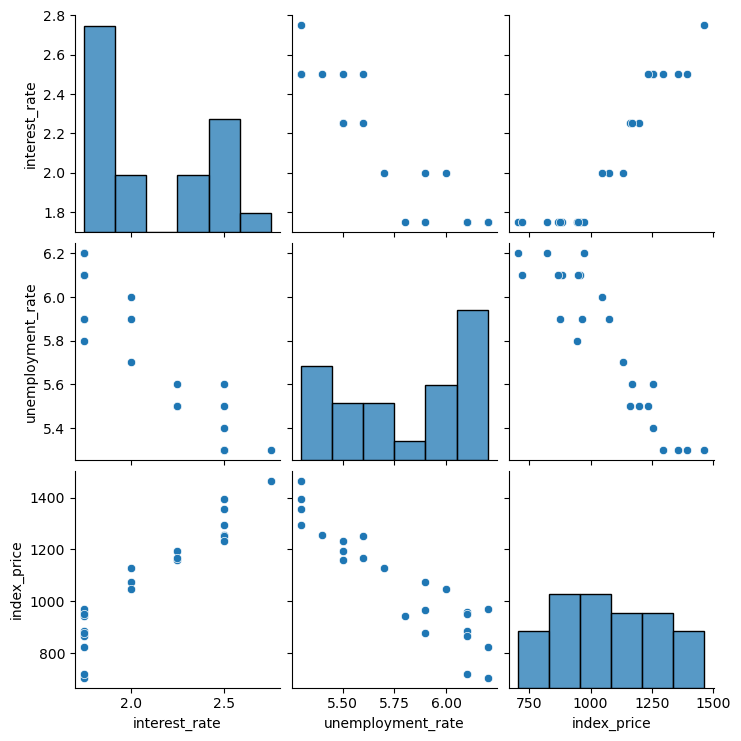

In [12]:
## scatter plot to show relationship between independent feature and dependent feature 

sns.pairplot(df)
plt.show()

In [13]:
# to check correlation
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


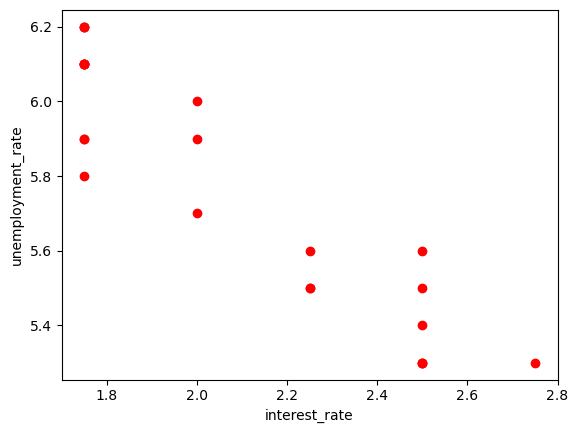

In [14]:
# visualize the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [15]:
# get independent and dependent feature
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
X_train.shape

(18, 2)

In [21]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='interest_rate', ylabel='index_price'>

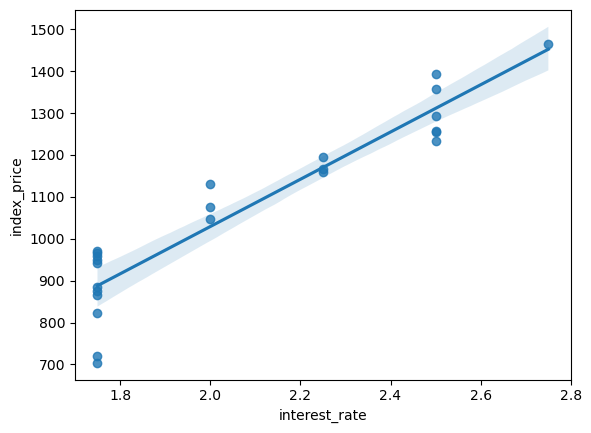

In [22]:
plt.show()

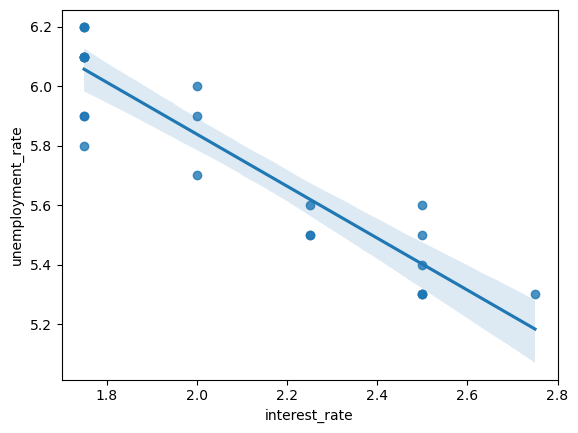

In [23]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)
plt.show()

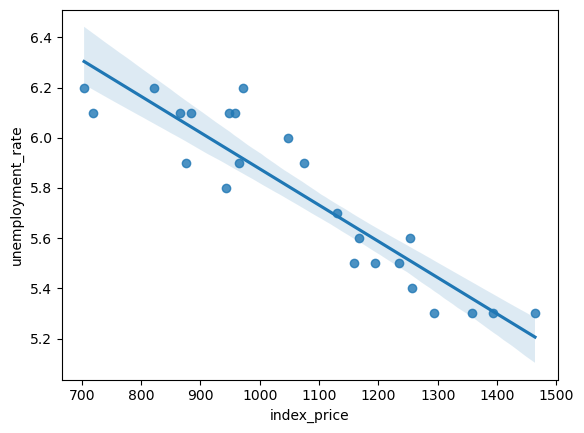

In [24]:
sns.regplot(x='index_price',y='unemployment_rate',data=df)
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [29]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression=LinearRegression()

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
# cross validation step
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                 cv=3)

In [36]:
np.mean(validation_score)

-5914.82818016239

In [37]:
#prediction
y_pred=regression.predict(X_test)


In [38]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [39]:
# performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [40]:
# R^2 and adjusted R^2 score
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.7591371539010254


In [41]:
# adjusted r^2 score 
1 - (1-score )* (len(y_test)-1) /(len(y_test)-X_test.shape[1]-1)

0.5985619231683756

# Assumptions

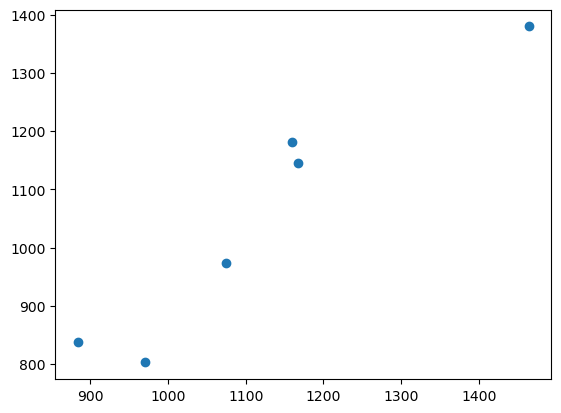

In [42]:
plt.scatter(y_test,y_pred)
plt.show()

In [43]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


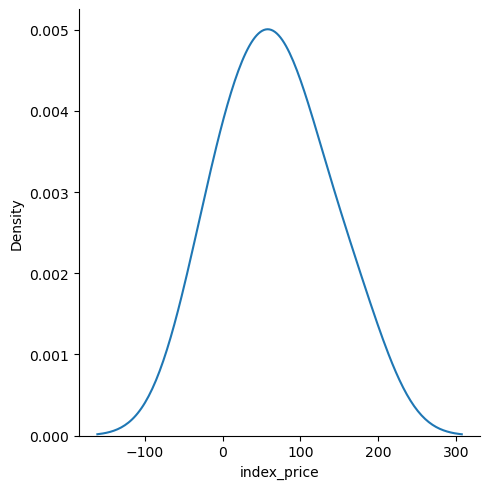

In [45]:
#plot this residuals
sns.displot(residuals,kind='kde')
plt.show()


In [46]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)


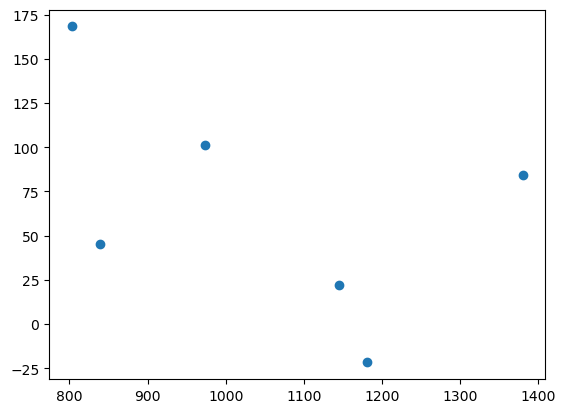

In [47]:
plt.show()

In [48]:
# OLS LINEAR REGRESSION
import statsmodels.api as sm 
model=sm.OLS(y_train,X_train).fit()

In [49]:
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 03 Mar 2025   Prob (F-statistic):                       0.754
Time:                        11:37:54   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [53]:
print(regression.intercept_)

1053.4444444444443
